In [2]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn
from torch.autograd import Variable

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
x_train, x_train.shape

(array([[ 3.3  ],
        [ 4.4  ],
        [ 5.5  ],
        [ 6.71 ],
        [ 6.93 ],
        [ 4.168],
        [ 9.779],
        [ 6.182],
        [ 7.59 ],
        [ 2.167],
        [ 7.042],
        [10.791],
        [ 5.313],
        [ 7.997],
        [ 3.1  ]], dtype=float32),
 (15, 1))

In [4]:
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
y_train, y_train.shape

(array([[1.7  ],
        [2.76 ],
        [2.09 ],
        [3.19 ],
        [1.694],
        [1.573],
        [3.366],
        [2.596],
        [2.53 ],
        [1.221],
        [2.827],
        [3.465],
        [1.65 ],
        [2.904],
        [1.3  ]], dtype=float32),
 (15, 1))

In [5]:
x_train = torch.from_numpy(x_train) # or torch.Tensor(x_train)
x_train

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

In [6]:
y_train = torch.from_numpy(y_train)
y_train

tensor([[1.7000],
        [2.7600],
        [2.0900],
        [3.1900],
        [1.6940],
        [1.5730],
        [3.3660],
        [2.5960],
        [2.5300],
        [1.2210],
        [2.8270],
        [3.4650],
        [1.6500],
        [2.9040],
        [1.3000]])

In [7]:
x_train, x_train.shape, y_train, y_train.shape

(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 3.1000]]),
 torch.Size([15, 1]),
 tensor([[1.7000],
         [2.7600],
         [2.0900],
         [3.1900],
         [1.6940],
         [1.5730],
         [3.3660],
         [2.5960],
         [2.5300],
         [1.2210],
         [2.8270],
         [3.4650],
         [1.6500],
         [2.9040],
         [1.3000]]),
 torch.Size([15, 1]))

In [8]:
# a quick intro/demo to the usage of super().__init__()
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

# Here we declare that the Square class inherits from the Rectangle class
class Square(Rectangle):
    def __init__(self, length):
        # super().__init__(length, length)
        super(Square, self).__init__(length, length)

a = Rectangle(5, 4)
print(a.area())

b = Square(4)
print(b.area())

20
16


In [9]:
# Linear Regression Model
class linearRegression(nn.Module):
    def __init__(self):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

Begin training...
Epoch[0/1000], loss: 3.583740
Epoch[20/1000], loss: 2.641477
Epoch[40/1000], loss: 1.975477
Epoch[60/1000], loss: 1.504724
Epoch[80/1000], loss: 1.171961
Epoch[100/1000], loss: 0.936722
Epoch[120/1000], loss: 0.770408
Epoch[140/1000], loss: 0.652806
Epoch[160/1000], loss: 0.569631
Epoch[180/1000], loss: 0.510787
Epoch[200/1000], loss: 0.469139
Epoch[220/1000], loss: 0.439645
Epoch[240/1000], loss: 0.418739
Epoch[260/1000], loss: 0.403905
Epoch[280/1000], loss: 0.393360
Epoch[300/1000], loss: 0.385848
Epoch[320/1000], loss: 0.380479
Epoch[340/1000], loss: 0.376625
Epoch[360/1000], loss: 0.373841
Epoch[380/1000], loss: 0.371814
Epoch[400/1000], loss: 0.370322
Epoch[420/1000], loss: 0.369208
Epoch[440/1000], loss: 0.368361
Epoch[460/1000], loss: 0.367703
Epoch[480/1000], loss: 0.367178
Epoch[500/1000], loss: 0.366748
Epoch[520/1000], loss: 0.366385
Epoch[540/1000], loss: 0.366069
Epoch[560/1000], loss: 0.365787
Epoch[580/1000], loss: 0.365528
Epoch[600/1000], loss: 0.365

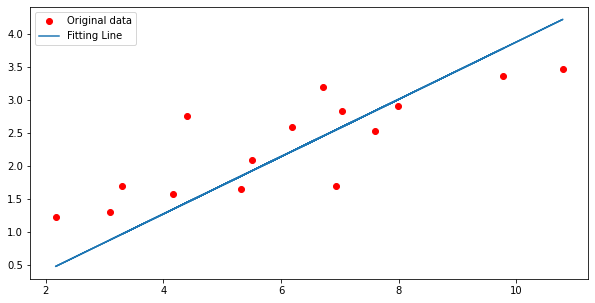

In [11]:
if __name__ == "__main__":
    
    # init
    model = linearRegression()
    criterion = nn.MSELoss() # loss function
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
    
    # training
    print("Begin training...")
    num_epochs = 1000
    
    for epoch in range(num_epochs):
        # data
        inputs = x_train
        target = y_train
        
        # forward
        out = model(inputs)
        loss = criterion(out, target)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # log the info and result
        if epoch % 20 == 0:
            print(f'Epoch[{epoch}/{num_epochs}], loss: {loss.item():.6f}')
    
    # finish training
    print("training is done...")
    
    # save the model
    torch.save(model.state_dict(), './saved_models/linearRegression.pth')
    print("Model is saved at ./saved_models")
    
    # validation
    model.eval()
    with torch.no_grad():
        y_predict = model(x_train)
        
    # check the validation result  
    fig = plt.figure(figsize=(10, 5))
    plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
    plt.plot(x_train.numpy(), y_predict, label='Fitting Line')
    plt.legend() 
    plt.show()